In [28]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
import re
from matplotlib import pyplot as plt
import seaborn as sns


#Loading Data

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/Data Science and GenAI Course Documents/06 - Others/Datasets/email.csv")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5573 entries, 0 to 5572
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5573 non-null   object
 1   Message   5573 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
data.rename(columns={"Category":"Label","Message":"Text"}, inplace = True)


#Exploratory Data Analysis

Text(0, 0.5, 'Number of Data points')

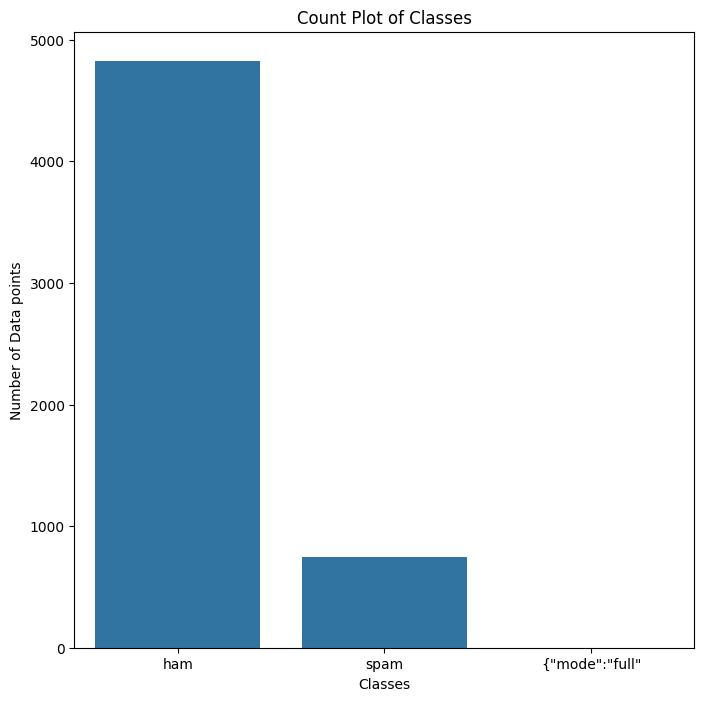

In [ ]:
plt.figure(figsize=(8,8))
fg = sns.countplot(x= data["Label"], )
fg.set_title("Count Plot of Classes")
fg.set_xlabel("Classes")
fg.set_ylabel("Number of Data points")

#Text Preprocessing part-1
* Cleaning the text
* tokenization
* Removing the Stop Words
* Lemmitization

#1.Cleaning the Text

In [ ]:
def clean(Text):
  sms=re.sub("[^a-zA-Z]"," ", Text)
  sms=sms.lower()
  sms=sms.split()
  sms=" ".join(sms)
  return sms

In [ ]:
data["Cleaned_text"]=data["Text"].apply(clean)

In [ ]:
data

,Label,Text,Cleaned_text
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in a wkly comp to win fa cup final ...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i don t think he goes to usf he lives arou...
...,...,...,...
5568,ham,Will ü b going to esplanade fr home?,will b going to esplanade fr home
5569,ham,"Pity, * was in mood for that. So...any other s...",pity was in mood for that so any other suggest...
5570,ham,The guy did some bitching but I acted like i'd...,the guy did some bitching but i acted like i d...
5571,ham,Rofl. Its true to its name,rofl its true to its name


#2.Tokenization

In [33]:
import nltk
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [38]:
data['Tokenized_text']=data.apply(lambda row: nltk.word_tokenize(row["Cleaned_text"]),axis=1)
print(data['Tokenized_text'][:5])

0    [go, until, jurong, point, crazy, available, o...
1                       [ok, lar, joking, wif, u, oni]
2    [free, entry, in, a, wkly, comp, to, win, fa, ...
3    [u, dun, say, so, early, hor, u, c, already, t...
4    [nah, i, don, t, think, he, goes, to, usf, he,...
Name: Tokenized_text, dtype: object


#3.Remove stop words

In [39]:
from nltk.corpus import stopwords
nltk.download("stopwords")
stop_words=set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [40]:
def removeStopWords(Text):
  filtered_text= [word for word in Text if word not in stop_words]
  return filtered_text

In [41]:
data["nostopword_text"]=data["Tokenized_text"].apply(removeStopWords)

In [42]:
data

,Label,Text,Cleaned_text,Tokenized_text,nostopword_text
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in a wkly comp to win fa cup final ...,"[free, entry, in, a, wkly, comp, to, win, fa, ...","[free, entry, wkly, comp, win, fa, cup, final,..."
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i don t think he goes to usf he lives arou...,"[nah, i, don, t, think, he, goes, to, usf, he,...","[nah, think, goes, usf, lives, around, though]"
...,...,...,...,...,...
5568,ham,Will ü b going to esplanade fr home?,will b going to esplanade fr home,"[will, b, going, to, esplanade, fr, home]","[b, going, esplanade, fr, home]"
5569,ham,"Pity, * was in mood for that. So...any other s...",pity was in mood for that so any other suggest...,"[pity, was, in, mood, for, that, so, any, othe...","[pity, mood, suggestions]"
5570,ham,The guy did some bitching but I acted like i'd...,the guy did some bitching but i acted like i d...,"[the, guy, did, some, bitching, but, i, acted,...","[guy, bitching, acted, like, interested, buyin..."
5571,ham,Rofl. Its true to its name,rofl its true to its name,"[rofl, its, true, to, its, name]","[rofl, true, name]"


In [52]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [53]:
lemmatizer=WordNetLemmatizer()

In [54]:
def lemmatizedText(Text):
  Lemmatized_text=[lemmatizer.lemmatize(word) for word in Text]
  return Lemmatized_text

In [56]:
data["Lemmatized_Text"] = data["nostopword_text"].apply(lemmatizedText)

#Vectorization

In [59]:
corpus = [' '.join(i) for i in data["Lemmatized_Text"]]


In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [62]:
x=tfidf.fit_transform(corpus)

In [63]:
from sklearn.preprocessing import LabelEncoder

In [64]:
Label_encoder=LabelEncoder()

In [70]:
data["Label"]=Label_encoder.fit_transform(data["Label"])

#Model Building

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [76]:
#Setting values for labels and feature as y and X(we already did X in vectorizing...)
y = data["Label"]
# Splitting the testing and training sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [78]:
model =MultinomialNB()

In [86]:
model.fit(X_train,y_train)

MultinomialNB()

#Model Testing

In [88]:
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score,  accuracy_score, f1_score

In [89]:
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    prec = metrics.precision_score(y_test, pred_test)
    recal = metrics.recall_score(y_test, pred_test)
    f1_s = metrics.f1_score(y_test, pred_test)
    train_accuracy = model.score(X_train,y_train)
    test_accuracy = model.score(X_test,y_test)

In [90]:
train_accuracy

0.9753252579632122

In [91]:
test_accuracy

0.968609865470852